<a href="https://colab.research.google.com/github/MissCoul/KNN/blob/main/HW2_Coulibaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#to view multiple output at one run
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#import needed library
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing manually distance data and label
data = pd.DataFrame({'x1': {'x1':0, 'x2':1.5, 'x3':1.4, 'x4':1.6, 'x5':1.7, 'x6':1.3, 'x7':1.6, 'x8': 1.5, 'x9':1.4, 'x10': 2.3, 'x11': 2.9, 'x12': 3.2, 'x13': 3.3, 'x14': 3.4, 'x15': 4.2, 'x16': 4.1, 'x17': 5.9, 'x18': 6.1, 'x19': 6.0},
                     'x2': {'x1':1.5, 'x2':0, 'x3':1.6, 'x4':1.4, 'x5':1.4, 'x6':1.4, 'x7':1.3, 'x8': 1.4, 'x9':1.3, 'x10': 2.4, 'x11': 2.8, 'x12': 3.3, 'x13': 3.4, 'x14': 3.2, 'x15': 4.1, 'x16': 4.1, 'x17': 6.2, 'x18': 6.3, 'x19': 6.1},
                     'x3': {'x1':1.4, 'x2':1.6, 'x3':0, 'x4':1.3, 'x5':1.5, 'x6':1.4, 'x7':1.4, 'x8': 1.6, 'x9':1.4, 'x10': 2.5, 'x11': 2.9, 'x12': 3.2, 'x13': 3.2, 'x14': 3.5, 'x15': 4.1, 'x16': 4.1, 'x17': 6.2, 'x18': 6.2, 'x19': 6.2},
                     'x4': {'x1':1.6, 'x2':1.4, 'x3':1.3, 'x4':0, 'x5':1.5, 'x6':1.5, 'x7':1.4, 'x8': 1.3, 'x9':1.5, 'x10': 2.3, 'x11': 3.0, 'x12': 3.1, 'x13': 3.2, 'x14': 3.4, 'x15': 4.1, 'x16': 4.1, 'x17': 5.8, 'x18': 5.8, 'x19': 5.8},
                     'x5': {'x1':1.7, 'x2':1.4, 'x3':1.5, 'x4':1.5, 'x5':0, 'x6':1.4, 'x7':1.5, 'x8': 1.7, 'x9':1.2, 'x10': 2.6, 'x11': 2.9, 'x12': 3.3, 'x13': 3.3, 'x14': 3.7, 'x15': 4.1, 'x16': 4.1, 'x17': 6.1, 'x18': 6.1, 'x19': 6.1},
                     'x6': {'x1':1.3, 'x2':1.4, 'x3':1.4, 'x4':1.5, 'x5':1.4, 'x6':0, 'x7':1.8, 'x8': 1.6, 'x9':1.4, 'x10': 2.7, 'x11': 3.1, 'x12': 3.4, 'x13': 3.4, 'x14': 3.5, 'x15': 4.1, 'x16': 4.1, 'x17': 6.0, 'x18': 6.0, 'x19': 6.0},
                     'x7': {'x1':1.6, 'x2':1.3, 'x3':1.4, 'x4':1.4, 'x5':1.5, 'x6':1.8, 'x7':0, 'x8': 1.4, 'x9':1.3, 'x10': 2.8, 'x11': 2.9, 'x12': 3.3, 'x13': 3.2, 'x14': 3.6, 'x15': 4.1, 'x16': 4.1, 'x17': 6.1, 'x18': 6.1, 'x19': 6.1},
                     'x8': {'x1':1.5, 'x2':1.4, 'x3':1.6, 'x4':1.3, 'x5':1.7, 'x6':1.6, 'x7':1.4, 'x8': 0, 'x9':1.5, 'x10': 2.7, 'x11': 3.1, 'x12': 3.4, 'x13': 3.3, 'x14': 3.3, 'x15': 4.1, 'x16': 4.1, 'x17': 5.9, 'x18': 5.9, 'x19': 5.9},
                     'x9': {'x1':1.4, 'x2':1.3, 'x3':1.4, 'x4':1.5, 'x5':1.2, 'x6':1.4, 'x7':1.3, 'x8': 1.5, 'x9':0, 'x10': 3.1, 'x11': 3.0, 'x12': 3.5, 'x13': 3.5, 'x14': 3.5, 'x15': 4.1, 'x16': 4.1, 'x17': 5.8, 'x18': 5.8, 'x19': 5.8},
                     'x10': {'x1':2.3, 'x2':2.4, 'x3':2.5, 'x4':2.3, 'x5':2.6, 'x6':2.7, 'x7':2.8, 'x8': 2.7, 'x9':3.1, 'x10': 0, 'x11': 1.5, 'x12': 3.3, 'x13': 3.6, 'x14': 3.6, 'x15': 4.1, 'x16': 4.1, 'x17': 6.0, 'x18': 6.0, 'x19': 6.0},
                     'x11': {'x1':2.9, 'x2':2.8, 'x3':2.9, 'x4':3.0, 'x5':2.9, 'x6':3.1, 'x7':2.9, 'x8': 3.1, 'x9':3.0, 'x10': 1.5, 'x11': 0, 'x12': 1.6, 'x13': 1.4, 'x14': 1.5, 'x15': 1.7, 'x16': 1.6, 'x17': 2.3, 'x18': 3.1, 'x19': 3.0},
                     'x12': {'x1':3.2, 'x2':3.3, 'x3':3.2, 'x4':3.1, 'x5':3.3, 'x6':3.4, 'x7':3.3, 'x8': 3.4, 'x9':3.5, 'x10': 3.3, 'x11': 1.6, 'x12': 0, 'x13': 1.7, 'x14': 1.8, 'x15': 1.6, 'x16': 1.5, 'x17': 2.3, 'x18': 2.7, 'x19': 2.9},
                     'x13': {'x1':3.3, 'x2':3.4, 'x3':3.2, 'x4':3.2, 'x5':3.3, 'x6':3.4, 'x7':3.2, 'x8': 3.3, 'x9':3.5, 'x10': 3.6, 'x11': 1.4, 'x12': 1.7, 'x13': 0, 'x14': 0.5, 'x15': 0.3, 'x16': 0.4, 'x17': 2.5, 'x18': 2.6, 'x19': 2.7},
                     'x14': {'x1':3.4, 'x2':3.2, 'x3':3.5, 'x4':3.4, 'x5':3.7, 'x6':3.5, 'x7':3.6, 'x8': 3.3, 'x9':3.5, 'x10': 3.6, 'x11': 1.5, 'x12': 1.8, 'x13': 0.5, 'x14': 0, 'x15': 0.5, 'x16': 0.5, 'x17': 2.3, 'x18': 2.3, 'x19': 2.4},
                     'x15': {'x1':4.2, 'x2':4.1, 'x3':4.1, 'x4':4.1, 'x5':4.1, 'x6':4.1, 'x7':4.1, 'x8': 4.1, 'x9':4.1, 'x10': 4.1, 'x11': 1.7, 'x12': 1.6, 'x13': 0.3, 'x14': 0.5, 'x15': 0, 'x16': 0.4, 'x17': 2.4, 'x18': 2.5, 'x19': 2.5},
                     'x16': {'x1':4.1, 'x2':4.1, 'x3':4.1, 'x4':4.1, 'x5':4.1, 'x6':4.1, 'x7':4.1, 'x8': 4.1, 'x9':4.1, 'x10': 4.1, 'x11': 1.6, 'x12': 1.5, 'x13': 0.4, 'x14': 0.5, 'x15': 0.4, 'x16': 0, 'x17': 2.5, 'x18': 2.6, 'x19': 2.8},
                     'x17': {'x1':5.9, 'x2':6.2, 'x3':6.2, 'x4':5.8, 'x5':6.1, 'x6':6.0, 'x7':6.1, 'x8': 5.9, 'x9':5.8, 'x10': 6.0, 'x11': 2.3, 'x12': 2.3, 'x13': 2.5, 'x14': 2.3, 'x15': 2.4, 'x16': 2.5, 'x17': 0, 'x18': 3.0, 'x19': 3.1},
                     'x18': {'x1':6.1, 'x2':6.3, 'x3':6.2, 'x4':5.8, 'x5':6.1, 'x6':6.0, 'x7':6.1, 'x8': 5.9, 'x9':5.8, 'x10': 6.0, 'x11': 3.1, 'x12': 2.7, 'x13': 2.6, 'x14': 2.3, 'x15': 2.5, 'x16': 2.6, 'x17': 3.0, 'x18': 0, 'x19': 0.4},
                     'x19': {'x1':6.0, 'x2':6.1, 'x3':6.2, 'x4':5.8, 'x5':6.1, 'x6':6.0, 'x7':6.1, 'x8': 5.9, 'x9':5.8, 'x10': 6.0, 'x11': 3.0, 'x12': 2.9, 'x13': 2.7, 'x14': 2.4, 'x15': 2.5, 'x16': 2.8, 'x17': 3.1, 'x18': 0.4, 'x19': 0},
                     'label': {'x1':1, 'x2':1, 'x3':2, 'x4':2, 'x5':1, 'x6':1, 'x7':2, 'x8': 2, 'x9':1, 'x10': 1, 'x11': 2, 'x12': 2, 'x13': 1, 'x14': 1, 'x15': 2, 'x16': 2, 'x17': 1, 'x18': 1, 'x19': 2}})


In [ ]:
#display the data to verify the values
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0,1
x2,1.5,0.0,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1,1
x3,1.4,1.6,0.0,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2,2
x4,1.6,1.4,1.3,0.0,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8,2
x5,1.7,1.4,1.5,1.5,0.0,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1,1
x6,1.3,1.4,1.4,1.5,1.4,0.0,1.8,1.6,1.4,2.7,3.1,3.4,3.4,3.5,4.1,4.1,6.0,6.0,6.0,1
x7,1.6,1.3,1.4,1.4,1.5,1.8,0.0,1.4,1.3,2.8,2.9,3.3,3.2,3.6,4.1,4.1,6.1,6.1,6.1,2
x8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,0.0,1.5,2.7,3.1,3.4,3.3,3.3,4.1,4.1,5.9,5.9,5.9,2
x9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,0.0,3.1,3.0,3.5,3.5,3.5,4.1,4.1,5.8,5.8,5.8,1
x10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,0.0,1.5,3.3,3.6,3.6,4.1,4.1,6.0,6.0,6.0,1


In [ ]:
#split data according to class label and display output for verification
data_class_1 = data.loc[data['label']==1]
data_class_2 = data.loc[data['label']==2]
data_class_1
data_class_2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0,1
x2,1.5,0.0,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1,1
x5,1.7,1.4,1.5,1.5,0.0,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1,1
x6,1.3,1.4,1.4,1.5,1.4,0.0,1.8,1.6,1.4,2.7,3.1,3.4,3.4,3.5,4.1,4.1,6.0,6.0,6.0,1
x9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,0.0,3.1,3.0,3.5,3.5,3.5,4.1,4.1,5.8,5.8,5.8,1
x10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,0.0,1.5,3.3,3.6,3.6,4.1,4.1,6.0,6.0,6.0,1
x13,3.3,3.4,3.2,3.2,3.3,3.4,3.2,3.3,3.5,3.6,1.4,1.7,0.0,0.5,0.3,0.4,2.5,2.6,2.7,1
x14,3.4,3.2,3.5,3.4,3.7,3.5,3.6,3.3,3.5,3.6,1.5,1.8,0.5,0.0,0.5,0.5,2.3,2.3,2.4,1
x17,5.9,6.2,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,2.3,2.3,2.5,2.3,2.4,2.5,0.0,3.0,3.1,1
x18,6.1,6.3,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.1,2.7,2.6,2.3,2.5,2.6,3.0,0.0,0.4,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x3,1.4,1.6,0.0,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2,2
x4,1.6,1.4,1.3,0.0,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8,2
x7,1.6,1.3,1.4,1.4,1.5,1.8,0.0,1.4,1.3,2.8,2.9,3.3,3.2,3.6,4.1,4.1,6.1,6.1,6.1,2
x8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,0.0,1.5,2.7,3.1,3.4,3.3,3.3,4.1,4.1,5.9,5.9,5.9,2
x11,2.9,2.8,2.9,3.0,2.9,3.1,2.9,3.1,3.0,1.5,0.0,1.6,1.4,1.5,1.7,1.6,2.3,3.1,3.0,2
x12,3.2,3.3,3.2,3.1,3.3,3.4,3.3,3.4,3.5,3.3,1.6,0.0,1.7,1.8,1.6,1.5,2.3,2.7,2.9,2
x15,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.7,1.6,0.3,0.5,0.0,0.4,2.4,2.5,2.5,2
x16,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.6,1.5,0.4,0.5,0.4,0.0,2.5,2.6,2.8,2
x19,6.0,6.1,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.0,2.9,2.7,2.4,2.5,2.8,3.1,0.4,0.0,2


In [ ]:
#create a function to split classes data into train and test for multiple use
def split_train_test(data):
    i = 0
    data_train_indexes = []
    data_test_indexes = []

    for _, record in data.iterrows():
        if i % 2 == 0:
            data_train_indexes.append(i)
        else:
            data_test_indexes.append(i)
        i += 1

    train_sample = data.iloc[data_train_indexes]
    test_sample = data.iloc[data_test_indexes]

    return train_sample, test_sample

In [ ]:
#split train and test values for class1
train_sample_1, test_sample_1 = split_train_test(data_class_1)

In [ ]:
#display for verification
train_sample_1
test_sample_1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0,1
x5,1.7,1.4,1.5,1.5,0.0,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1,1
x9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,0.0,3.1,3.0,3.5,3.5,3.5,4.1,4.1,5.8,5.8,5.8,1
x13,3.3,3.4,3.2,3.2,3.3,3.4,3.2,3.3,3.5,3.6,1.4,1.7,0.0,0.5,0.3,0.4,2.5,2.6,2.7,1
x17,5.9,6.2,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,2.3,2.3,2.5,2.3,2.4,2.5,0.0,3.0,3.1,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x2,1.5,0.0,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1,1
x6,1.3,1.4,1.4,1.5,1.4,0.0,1.8,1.6,1.4,2.7,3.1,3.4,3.4,3.5,4.1,4.1,6.0,6.0,6.0,1
x10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,0.0,1.5,3.3,3.6,3.6,4.1,4.1,6.0,6.0,6.0,1
x14,3.4,3.2,3.5,3.4,3.7,3.5,3.6,3.3,3.5,3.6,1.5,1.8,0.5,0.0,0.5,0.5,2.3,2.3,2.4,1
x18,6.1,6.3,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.1,2.7,2.6,2.3,2.5,2.6,3.0,0.0,0.4,1


In [ ]:
#split train and test values for class2 and display values for verification
train_sample_2, test_sample_2 = split_train_test(data_class_2)
train_sample_2
test_sample_2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x3,1.4,1.6,0.0,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2,2
x7,1.6,1.3,1.4,1.4,1.5,1.8,0.0,1.4,1.3,2.8,2.9,3.3,3.2,3.6,4.1,4.1,6.1,6.1,6.1,2
x11,2.9,2.8,2.9,3.0,2.9,3.1,2.9,3.1,3.0,1.5,0.0,1.6,1.4,1.5,1.7,1.6,2.3,3.1,3.0,2
x15,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.7,1.6,0.3,0.5,0.0,0.4,2.4,2.5,2.5,2
x19,6.0,6.1,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.0,2.9,2.7,2.4,2.5,2.8,3.1,0.4,0.0,2


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x4,1.6,1.4,1.3,0.0,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8,2
x8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,0.0,1.5,2.7,3.1,3.4,3.3,3.3,4.1,4.1,5.9,5.9,5.9,2
x12,3.2,3.3,3.2,3.1,3.3,3.4,3.3,3.4,3.5,3.3,1.6,0.0,1.7,1.8,1.6,1.5,2.3,2.7,2.9,2
x16,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.6,1.5,0.4,0.5,0.4,0.0,2.5,2.6,2.8,2


In [ ]:
#concatinate training samples of each class together and display output for verification
train_sample = [train_sample_1, train_sample_2]
train_sample = pd.concat(train_sample)
train_sample

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0,1
x5,1.7,1.4,1.5,1.5,0.0,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1,1
x9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,0.0,3.1,3.0,3.5,3.5,3.5,4.1,4.1,5.8,5.8,5.8,1
x13,3.3,3.4,3.2,3.2,3.3,3.4,3.2,3.3,3.5,3.6,1.4,1.7,0.0,0.5,0.3,0.4,2.5,2.6,2.7,1
x17,5.9,6.2,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,2.3,2.3,2.5,2.3,2.4,2.5,0.0,3.0,3.1,1
x3,1.4,1.6,0.0,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2,2
x7,1.6,1.3,1.4,1.4,1.5,1.8,0.0,1.4,1.3,2.8,2.9,3.3,3.2,3.6,4.1,4.1,6.1,6.1,6.1,2
x11,2.9,2.8,2.9,3.0,2.9,3.1,2.9,3.1,3.0,1.5,0.0,1.6,1.4,1.5,1.7,1.6,2.3,3.1,3.0,2
x15,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.7,1.6,0.3,0.5,0.0,0.4,2.4,2.5,2.5,2
x19,6.0,6.1,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.0,2.9,2.7,2.4,2.5,2.8,3.1,0.4,0.0,2


In [ ]:
#concatinate test samples of each class together and display output for verification
test_sample = [test_sample_1, test_sample_2]
test_sample = pd.concat(test_sample)
test_sample

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
x2,1.5,0.0,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1,1
x6,1.3,1.4,1.4,1.5,1.4,0.0,1.8,1.6,1.4,2.7,3.1,3.4,3.4,3.5,4.1,4.1,6.0,6.0,6.0,1
x10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,0.0,1.5,3.3,3.6,3.6,4.1,4.1,6.0,6.0,6.0,1
x14,3.4,3.2,3.5,3.4,3.7,3.5,3.6,3.3,3.5,3.6,1.5,1.8,0.5,0.0,0.5,0.5,2.3,2.3,2.4,1
x18,6.1,6.3,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.1,2.7,2.6,2.3,2.5,2.6,3.0,0.0,0.4,1
x4,1.6,1.4,1.3,0.0,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8,2
x8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,0.0,1.5,2.7,3.1,3.4,3.3,3.3,4.1,4.1,5.9,5.9,5.9,2
x12,3.2,3.3,3.2,3.1,3.3,3.4,3.3,3.4,3.5,3.3,1.6,0.0,1.7,1.8,1.6,1.5,2.3,2.7,2.9,2
x16,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.6,1.5,0.4,0.5,0.4,0.0,2.5,2.6,2.8,2


In [ ]:
#to normalize data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
def build_model(data, n_neighbors):
    #normalize
    st_x = StandardScaler()
    x_train = data.iloc[:, [0,18]].values
    y_train = data['label'].values
    #nomalization
    x_train = st_x.fit_transform(x_train)
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(x_train, y_train)

    return classifier, classifier.score(x_train, y_train)

In [ ]:
#assign k values
k_values=range(1,11)
train_scores=[]
test_scores=[]
for i in k_values:
    classifier, train_score = build_model(train_sample, i)
    x_test = test_sample.iloc[:, [0,18]].values
    x_test = st_x.fit_transform(x_test)
    y_test = test_sample['label'].values
    y_pred = classifier.predict(x_test)
    test_score = classifier.score(x_test, y_test)
    train_score = 1 - train_score
    test_score = 1 - test_score
    train_scores.append(train_score)
    test_scores.append(test_score)

    #Creating the Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print("confusion matrix for ", i, "neighbors")
    cm

confusion matrix for  1 neighbors


array([[3, 2],
       [3, 1]])

confusion matrix for  2 neighbors


array([[5, 0],
       [4, 0]])

confusion matrix for  3 neighbors


array([[1, 4],
       [1, 3]])

confusion matrix for  4 neighbors


array([[5, 0],
       [4, 0]])

confusion matrix for  5 neighbors


array([[3, 2],
       [3, 1]])

confusion matrix for  6 neighbors


array([[5, 0],
       [4, 0]])

confusion matrix for  7 neighbors


array([[5, 0],
       [4, 0]])

confusion matrix for  8 neighbors


array([[5, 0],
       [4, 0]])

confusion matrix for  9 neighbors


array([[3, 2],
       [2, 2]])

confusion matrix for  10 neighbors


array([[5, 0],
       [4, 0]])

(<Figure size 864x504 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, 'K values')

Text(0, 0.5, 'Error rate')

Text(0.5, 1.0, 'Performance Under Varying K Values')

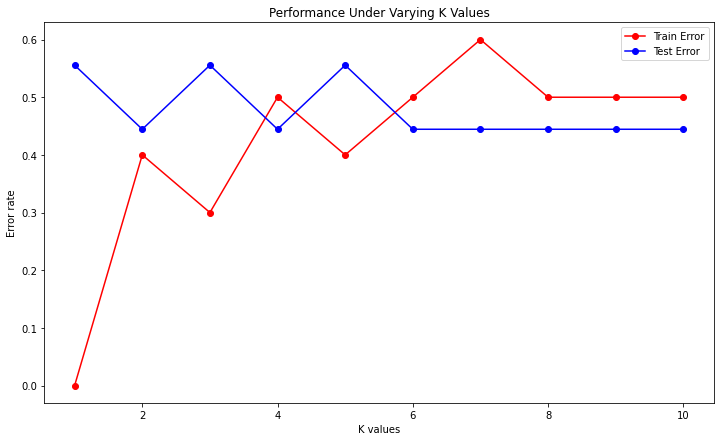

In [ ]:
#plot train and test errors
plt.subplots(1, figsize=(12,7))
plt.plot(k_values, train_scores, color='red',label='Train Error', marker='o')
plt.plot(k_values, test_scores, color='blue',label='Test Error', marker = 'o')
plt.xlabel('K values')
plt.ylabel('Error rate')
plt.title('Performance Under Varying K Values')
plt.legend(loc="upper right")

plt.savefig('error_plot.png')